<a href="https://colab.research.google.com/github/sonicmortis/DIF62310_KelasB_25_2311532020/blob/main/DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pada bagian kode ini digunakan fungsi load_iris() dari modul sklearn.datasets untuk memuat dataset Iris, yang merupakan dataset klasik dalam machine learning. Dataset ini terdiri dari 150 sampel bunga iris dengan 4 fitur utama, yaitu panjang dan lebar sepal serta panjang dan lebar petal. Data fitur disimpan dalam variabel x, sedangkan label target berupa jenis bunga disimpan dalam y.

Selanjutnya, melalui perintah x.shape, diperoleh informasi mengenai jumlah sampel dan jumlah fitur yang kemudian disimpan dalam variabel n_samples dan n_features. Hasil akhir dari kode ini adalah mencetak jumlah sampel sebanyak 150 dan jumlah fitur sebanyak 4

In [13]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y = iris.target

n_samples, n_features = x.shape

print(f"Number of samples: {n_samples}")
print(f"Number of features: {n_features}")

Number of samples: 150
Number of features: 4


Cell ini menampilkan visualisasi hubungan antar fitur pada dataset Iris menggunakan *scatter plot matrix*. Grid subplot 4×4 dibuat sesuai jumlah fitur, lalu kombinasi fitur ditampilkan dalam bentuk scatter plot berwarna berdasarkan label kelas. Histogram pada diagonal menunjukkan distribusi masing-masing fitur. Visualisasi ini membantu melihat pola, korelasi antar fitur, serta potensi pemisahan antar kelas.


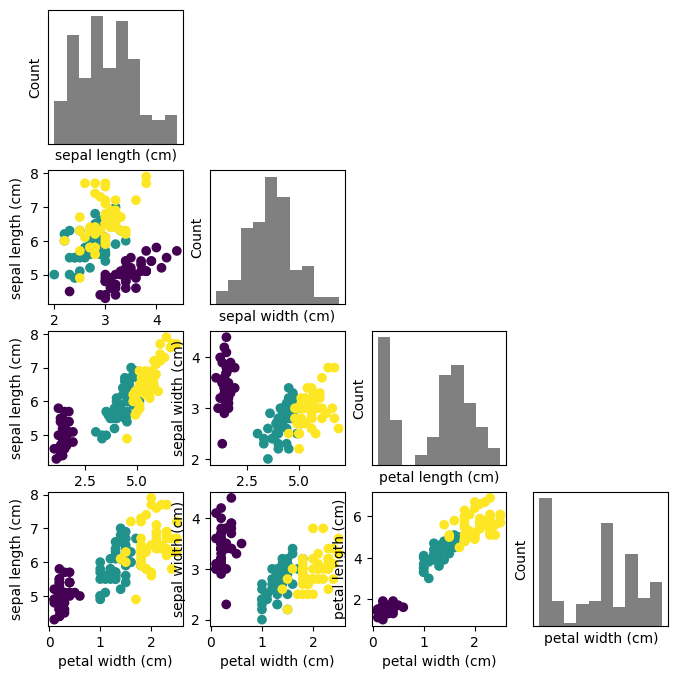

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows = n_features, ncols = n_features, figsize = (8, 8))
fig.tight_layout

names = iris.feature_names

for i, j in zip(*np.triu_indices_from(ax, k=1)):
  ax[j, i].scatter(x[:, j], x[:, i], c = y)
  ax[j, i].set_xlabel(names[j])
  ax[j, i].set_ylabel(names[i])
  ax[i, j].set_axis_off()

for i in range(n_features):
  ax[i, i].hist(x[:, i], color = 'grey')
  ax[i, i].set_ylabel('Count')
  ax[i, i].set_xlabel(names[i])
  ax[i, i].set_yticks([])
  ax[i, i].set_xticks([])



Pada bagian ini, kembali dilakukan proses standarisasi data menggunakan fungsi buatan sendiri. Fungsi `mean()` dan `std()` menghitung rata-rata dan standar deviasi dari sebuah array satu dimensi, sedangkan `Standardize_data()` menerapkan rumus standar `(x - mean) / std` untuk melakukan normalisasi. Namun, karena `x` merupakan array dua dimensi, fungsi ini akan error atau memberikan hasil tidak sesuai. Untuk standarisasi per fitur (per kolom), seharusnya dilakukan iterasi atau menggunakan metode berbasis array seperti `sklearn.preprocessing.StandardScaler`. Jika tidak diubah, fungsi ini hanya cocok untuk array satu dimensi.


In [15]:
def mean(x):
  return sum(x)/len(x)

def std(x):
  return (sum((i - mean(x))**2 for i in x)/len(x))**0.5

def Standardize_data(x):
  return (x - mean(x))/std(x)

X_std = Standardize_data(x)

In [16]:
print(x)
print(X_std)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

 fungsi covariance(x) digunakan untuk menghitung matriks kovarians dari data yang telah distandarisasi. Matriks kovarians adalah matriks yang menggambarkan hubungan linear antar fitur dalam dataset apakah dua fitur saling meningkat bersama (kovarians positif), atau satu meningkat saat yang lain menurun (kovarians negatif).

In [17]:
def covariance(x):
  return (x.T @ x)/(x.shape[0] - 1)

cov_mat = covariance(X_std)

In [18]:
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

Pada cell ini, dilakukan dekomposisi eigen terhadap matriks kovarians untuk mendapatkan nilai eigen (eig_vals) dan vektor eigen (eig_vecs) yang merepresentasikan besarnya variansi dan arah komponen utama. Kemudian, arah vektor eigen diselaraskan agar konsisten positif pada nilai absolut terbesarnya. Hasil akhirnya adalah daftar eigenvalues dan eigenvectors yang siap digunakan untuk transformasi PCA.

In [19]:
from numpy.linalg import eig

eig_vals, eig_vecs = eig(cov_mat)

max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs*signs[np.newaxis,:]
eig_vecs = eig_vecs.T

print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

Eigenvalues 
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors 
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


Cell ini menyusun pasangan nilai dan vektor eigen dalam bentuk list `eig_pairs`, lalu mengurutkannya berdasarkan nilai eigen terbesar ke terkecil. Langkah ini penting untuk menentukan urutan komponen utama berdasarkan kontribusi variansi terbesar. Setelah diurutkan, nilai dan vektor eigen disimpan kembali ke dalam `eig_vals_sorted` dan `eig_vecs_sorted`, yang nantinya akan digunakan untuk memilih dan membentuk ruang fitur baru dalam PCA.


In [20]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i, :]) for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)

eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

eig_pairs

[(np.float64(2.9380850501999918),
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (np.float64(0.920164904162487),
  array([0.37741762, 0.92329566, 0.02449161, 0.06694199])),
 (np.float64(0.14774182104494785),
  array([ 0.71956635, -0.24438178, -0.14212637, -0.63427274])),
 (np.float64(0.020853862176462023),
  array([-0.26128628,  0.12350962,  0.80144925, -0.52359713]))]

Pada bagian ini, dipilih sejumlah `k = 2` komponen utama teratas untuk reduksi dimensi. Matriks `W` dibentuk dari dua vektor eigen pertama (dengan variansi terbesar) yang diambil dari `eig_vecs_sorted`. Matriks ini berfungsi sebagai *projection matrix* yang akan digunakan untuk mentransformasikan data ke ruang berdimensi lebih rendah. Hasil `W.shape` menunjukkan ukuran matriks proyeksi, yaitu 2 baris (komponen utama) dan 4 kolom (jumlah fitur asli).


In [21]:
k = 2
W = eig_vecs_sorted[:k, :]

print(W.shape)

(2, 4)


Pada bagian ini, dihitung persentase variansi yang dijelaskan oleh masing-masing komponen utama dengan membagi setiap nilai eigen dengan total keseluruhan nilai eigen, lalu dikali 100. Hasilnya dibulatkan dan disimpan dalam `explained_variance`. Selanjutnya, dihitung akumulasi variansi (cumulative explained variance) untuk melihat seberapa banyak informasi yang bisa dipertahankan jika hanya menggunakan beberapa komponen. Grafik yang ditampilkan menunjukkan hubungan antara jumlah komponen dengan akumulasi variansi, yang berguna untuk menentukan jumlah komponen optimal dalam PCA.


Explained variance: [72.96 22.85  3.67  0.52]
Cumulative explained variance: [ 72.96  95.81  99.48 100.  ]


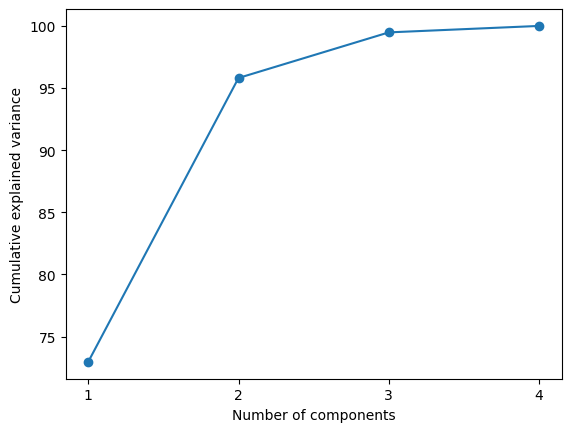

In [22]:
eig_vals_total  = sum(eig_vals)
explained_variance = [(i / eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1, n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1, n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

Pada cell ini, data yang telah distandarisasi (`X_std`) diproyeksikan ke ruang berdimensi lebih rendah menggunakan matriks proyeksi `W`. Operasi `X_std.dot(W.T)` menghasilkan data baru `X_proj` dalam ruang 2 dimensi (karena `k = 2` sebelumnya). Proyeksi ini mempertahankan sebagian besar informasi dari data asli namun dalam dimensi yang lebih ringkas. Hasil `X_proj.shape` menunjukkan dimensi hasil reduksi, sementara `x.shape` tetap menunjukkan bentuk awal data sebelum transformasi.


In [23]:
X_proj = X_std.dot(W.T)

print(X_proj.shape)
print(x.shape)

(150, 2)
(150, 4)


Cell ini menampilkan visualisasi data yang telah direduksi ke dua dimensi utama menggunakan PCA. Setiap titik pada scatter plot mewakili satu sampel dari dataset, dengan warna menunjukkan kelas (label) masing-masing. Sumbu x dan y merepresentasikan komponen utama pertama (PC1) dan kedua (PC2). Judul grafik menampilkan persentase akumulasi variansi yang berhasil ditangkap oleh dua komponen utama tersebut, berdasarkan nilai `cum_explained_variance[1]`.


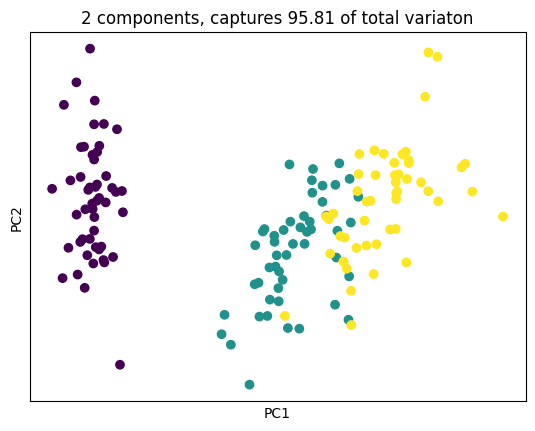

In [24]:
plt.scatter(X_proj[:, 0], X_proj[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {} of total variaton'.format(cum_explained_variance[1]))
plt.show()

Cell ini melakukan PCA menggunakan fungsi bawaan dari `sklearn`. Objek `PCA` dibuat dengan `n_components=2`, lalu diterapkan pada data yang telah distandarisasi (`x_std`) menggunakan `fit_transform()`, menghasilkan data berdimensi 2 dalam `x_pca`. Variansi yang dijelaskan oleh masing-masing komponen disimpan dalam `explained_variance_ratio_`, dan akumulasinya dihitung dengan `.cumsum()`. Hasil visualisasi menampilkan proyeksi data ke dua komponen utama, mirip seperti sebelumnya, namun kali ini lebih praktis dan akurat karena menggunakan library resmi yang sudah mengatur seluruh proses PCA secara otomatis.


Explained variance per component: [0.72962445 0.22850762]
Cumulative explained variance: [0.72962445 0.95813207]


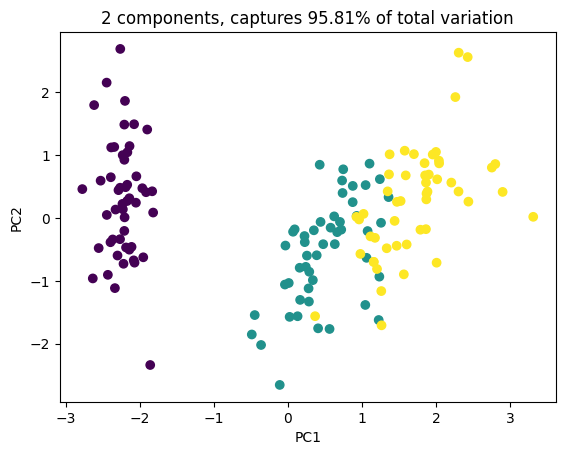

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_std)

explained_variance = pca.explained_variance_ratio_
cum_explained_variance = explained_variance.cumsum()

print(f'Explained variance per component: {explained_variance}')
print(f'Cumulative explained variance: {cum_explained_variance}')

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'2 components, captures {cum_explained_variance[1]*100:.2f}% of total variation')
plt.show()
